# 회귀 모델 연습문제

### 회귀 모델 예측 작업
- (1) 데이터 준비 : 보스턴 주택 가격 데이터 : boston_dataset.csv
- (2) 알아서 전처리
- (3) 모델링
        - 회귀 모델 : loss ='mean_squared_error'
        - 회귀는 활성화함수 빼도 됨
- (4) 실제가격과 예측가격 비교 : 20건 (실제 수치로 비교)
- (5) 모델 저장/ 모델 로드
- (6) 시각화

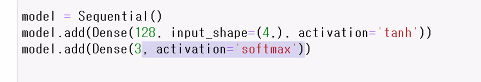

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from keras.utils import to_categorical

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드

In [5]:
boston_df = df_pop = pd.read_csv('../data/boston_dataset.csv', index_col=0) 
boston_df.head(1)
boston_df.tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


# 데이터 기초 정보 확인
- row : 506
- column :  14

In [6]:
boston_df.info()
# feature : 14개(0~13)
# object Dtype : 0개

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [7]:
boston_df.isnull().sum() # 결측치 0개

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
boston_df['PRICE'].value_counts()

PRICE
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

# 피처, 타겟 설정

In [9]:
# 타깃값 데이터 세트
y_target = boston_df['PRICE']
y_target[:3]

# 피처값 데이터 세트
X_data = boston_df.drop('PRICE', axis=1)
X_data[:1]

0    24.0
1    21.6
2    34.7
Name: PRICE, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


# 피처 스케일링

In [10]:
# 스케일링 후 그래프를 위해 df로 변환

scaler = StandardScaler()
X_data_sc = scaler.fit_transform(X_data)

X_data_sc_df = pd.DataFrame(X_data_sc, columns=X_data.columns)
X_data_sc_df[:1]

X_data.describe().round(3)
X_data_sc_df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.28483,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459,0.441052,-1.075562


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.420,-0.488,-1.558,-0.273,-1.466,-3.880,-2.335,-1.267,-0.983,-1.314,-2.707,-3.907,-1.531
25%,-0.411,-0.488,-0.868,-0.273,-0.913,-0.569,-0.837,-0.806,-0.638,-0.768,-0.488,0.205,-0.799
50%,-0.391,-0.488,-0.211,-0.273,-0.144,-0.108,0.317,-0.279,-0.523,-0.465,0.275,0.381,-0.181
75%,0.007,0.049,1.016,-0.273,0.599,0.483,0.907,0.662,1.661,1.531,0.807,0.434,0.603
max,9.934,3.804,2.423,3.668,2.732,3.555,1.117,3.961,1.661,1.798,1.639,0.441,3.549


In [11]:
# 스케일링 전 / 후 1행 수치 비교
X_data_comb = pd.concat((X_data[:1], X_data_sc_df[:1]), axis=0)
X_data_comb.round(3)

# ['ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B']
# 스케일링 전 / 후 수치 크게 변화

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.20,4.09,1.000,296.000,15.300,396.900,4.980
0,-0.420,0.285,-1.288,-0.273,-0.144,0.414,-0.12,0.14,-0.983,-0.667,-1.459,0.441,-1.076


# 스케일링 전 / 후 그래프 결과  
x축 범위만 다를 뿐  
X_data  
X_data_scaled  
그래프 분포 동일한 형태 확인


In [12]:
X_data_sc_ex = X_data_sc_df[['ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B']] # 6
X_data_ex = X_data[['ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B']] # 6

def visualize(data):
    plt.figure(figsize=(28, 8))

    for i, column in enumerate(data.columns, 1):
        plt.subplot(2, 7, i)
        sns.regplot(x=data[column], y=y_target)
        plt.xlabel(column, fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

# data 를 인수를 받아서 data의 그래프 확인하는 함수

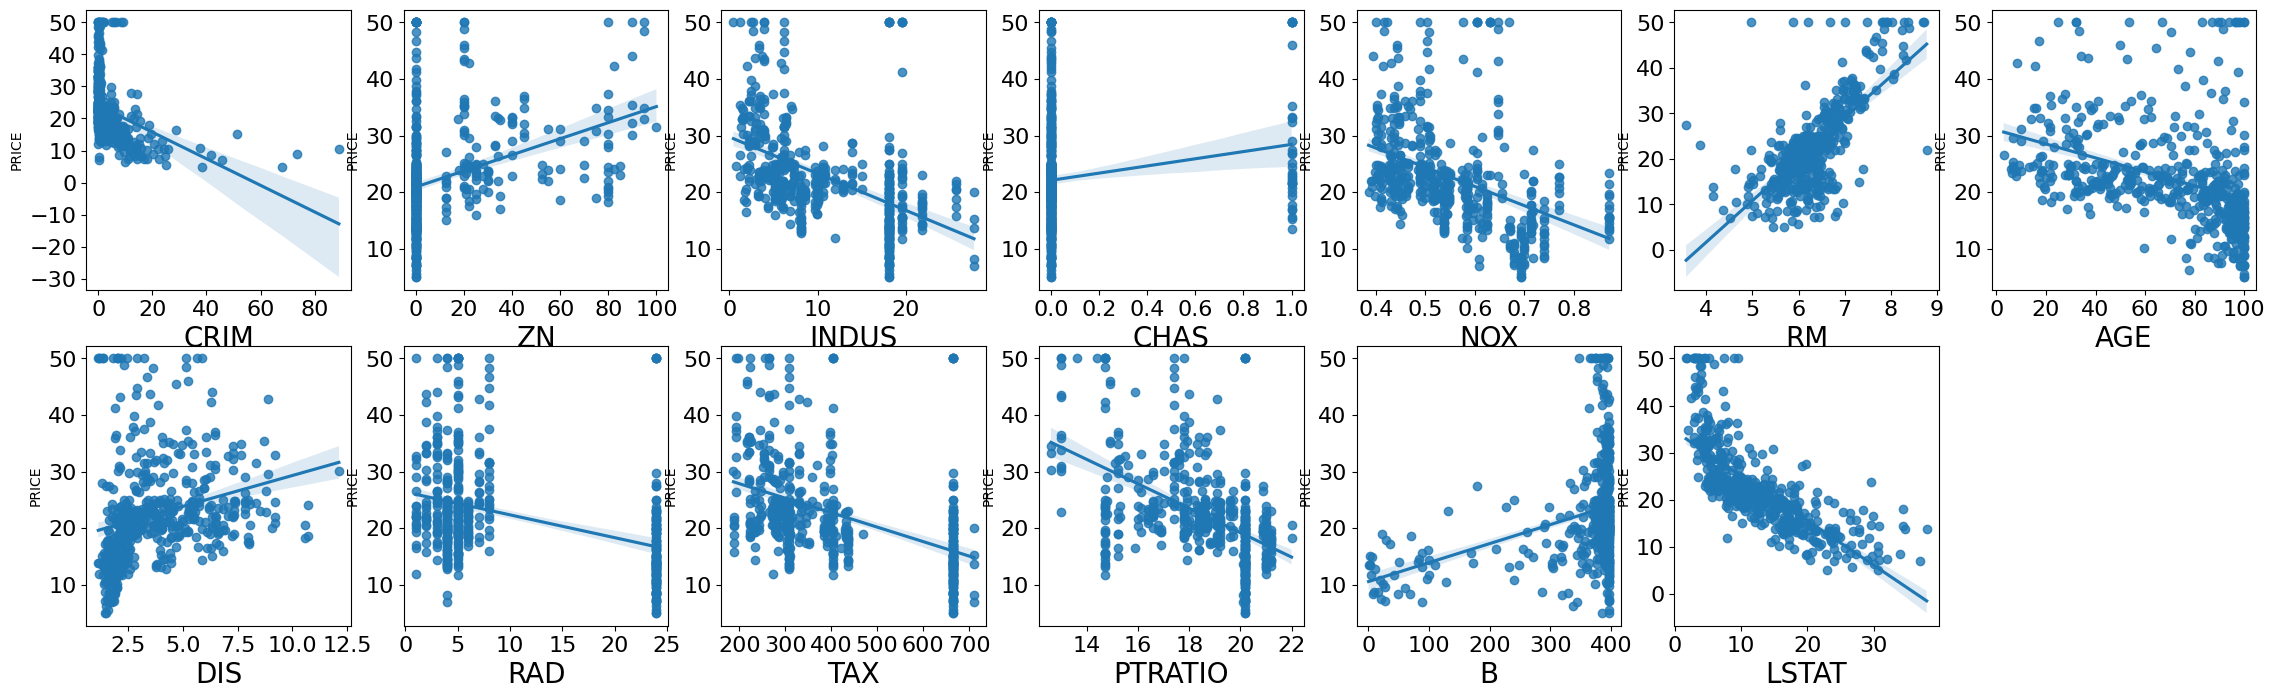

In [13]:
visualize(X_data) # 스케일 전

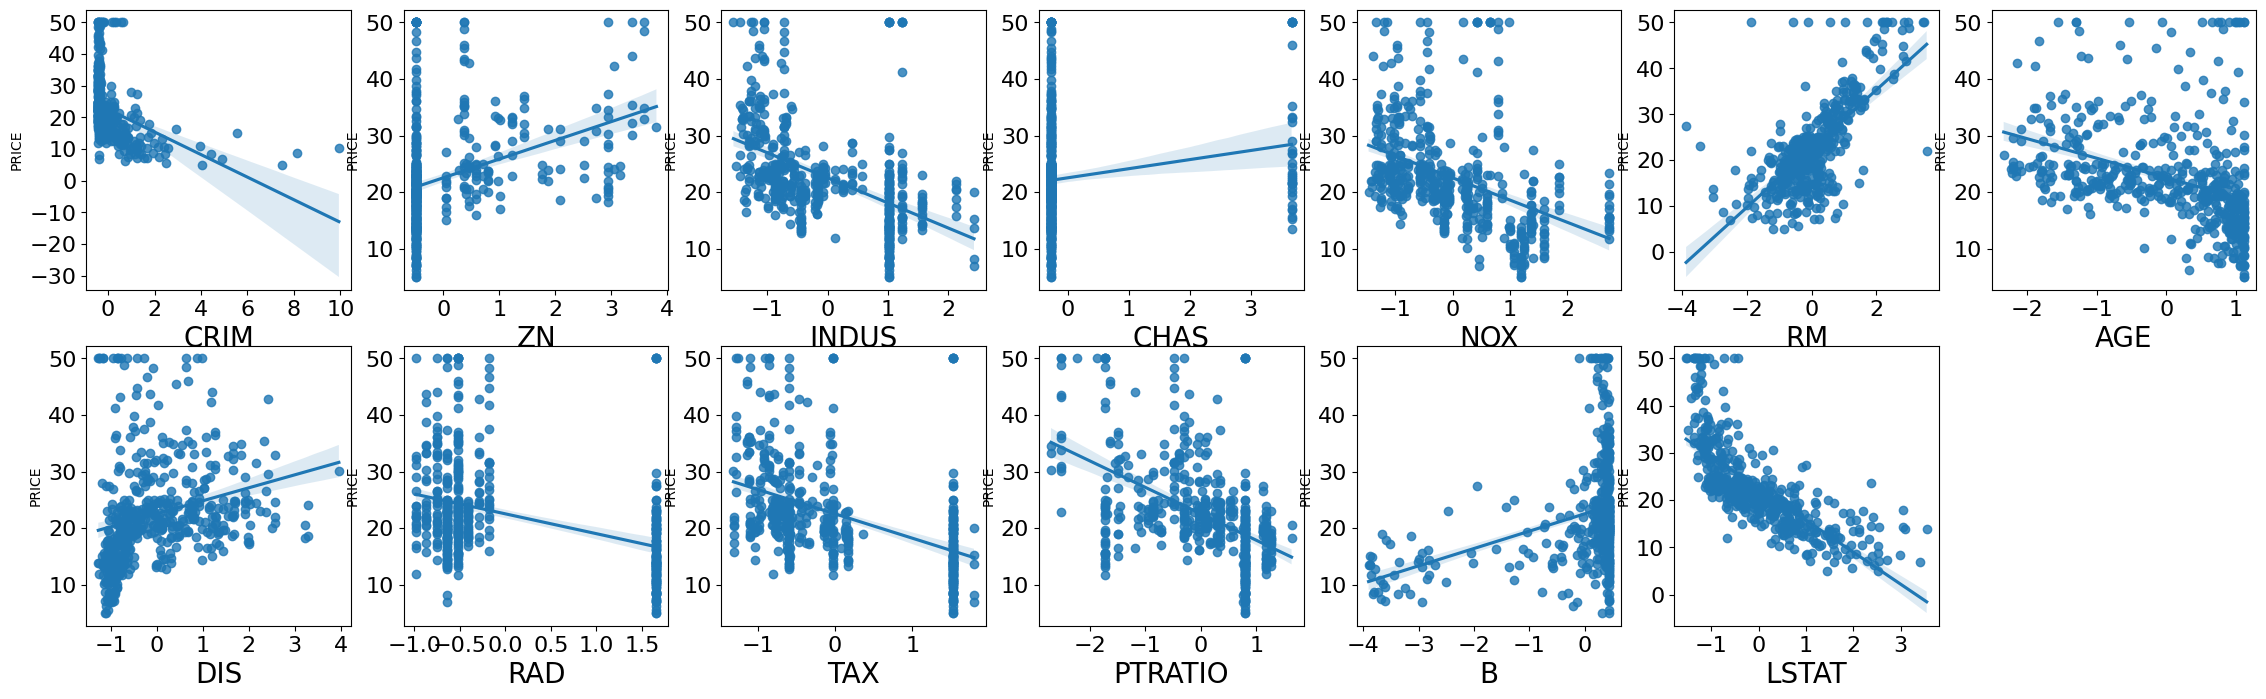

In [14]:
visualize(X_data_sc_df) # 스케일 후

In [15]:
# visualize(X_data_ex) # 스케일 전

In [16]:
# visualize(X_data_sc_ex) # 스케일 후

# 훈련 테스트 데이터 생성

### y_target = boston_df['PRICE'] 의 데이터가 클래스 레이블이 아니므로 원-핫 인코딩 to_categorical 적용 X  
y_train2 = to_categorical(y_train)  
y_test2 = to_categorical(y_test)  

In [17]:
# 스케일링 피처 데이터 적용

X_train , X_test , y_train , y_test = train_test_split(X_data_sc,
                                                       y_target,
                                                       test_size=0.3, 
                                                       random_state=156)

In [18]:
# 데이터 세트 확인
X_train.shape  # (354, 13)
y_train.shape # (354,)
X_test.shape # (152, 13)
y_test.shape # (152,)

(354, 13)

(354,)

(152, 13)

(152,)

# 모델 생성 / 평가

In [19]:

tf.random.set_seed(3)

model = Sequential()



model.add(Dense(42, input_shape=(13,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])
epochs=100
batch_size=32



history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

loss, mean_absolute_error = model.evaluate(X_test, y_test)

print(f'mean_absolute_error : {mean_absolute_error:.4f}, loss : {loss:.4f}')

# mean_absolute_error : 2.7435, loss : 12.8259

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 607.7444 - mean_absolute_error: 22.8841 - val_loss: 519.5938 - val_mean_absolute_error: 21.3218
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 587.5870 - mean_absolute_error: 22.4744 - val_loss: 504.3713 - val_mean_absolute_error: 20.9643
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 570.8646 - mean_absolute_error: 22.1159 - val_loss: 487.8998 - val_mean_absolute_error: 20.5970
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 553.8760 - mean_absolute_error: 21.7617 - val_loss: 474.2065 - val_mean_absolute_error: 20.2645
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 538.0284 - mean_absolute_error: 21.4126 - val_loss: 458.7430 - val_mean_absolute_error: 19.8959
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 520.8290 - mean_absolute_error: 21.0401 - val_loss: 442.9271 - val_mean_absolute_

Epoch 50/100
12/12 [==============================] - 0s 4ms/step - loss: 30.7597 - mean_absolute_error: 4.0065 - val_loss: 24.4427 - val_mean_absolute_error: 3.9787
Epoch 51/100
12/12 [==============================] - 0s 4ms/step - loss: 30.0185 - mean_absolute_error: 3.9791 - val_loss: 24.0494 - val_mean_absolute_error: 3.9366
Epoch 52/100
12/12 [==============================] - 0s 4ms/step - loss: 29.2475 - mean_absolute_error: 3.9294 - val_loss: 23.3006 - val_mean_absolute_error: 3.8669
Epoch 53/100
12/12 [==============================] - 0s 4ms/step - loss: 28.6080 - mean_absolute_error: 3.8678 - val_loss: 22.6674 - val_mean_absolute_error: 3.8094
Epoch 54/100
12/12 [==============================] - 0s 3ms/step - loss: 27.9542 - mean_absolute_error: 3.8232 - val_loss: 21.9140 - val_mean_absolute_error: 3.7328
Epoch 55/100
12/12 [==============================] - 0s 3ms/step - loss: 27.3984 - mean_absolute_error: 3.7720 - val_loss: 21.8224 - val_mean_absolute_error: 3.7325
Epoc

# 그래프

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'mean_absolute_error')

<Axes: >

Text(0.5, 1.0, 'loss')

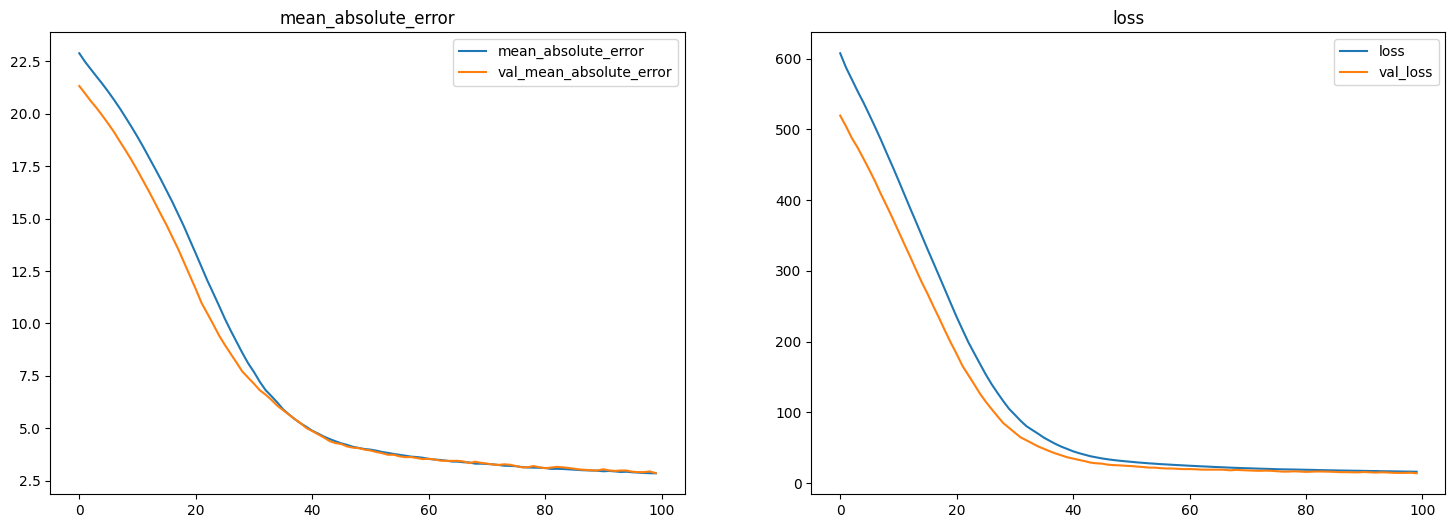

In [20]:
plt. figure(figsize=(18, 6))

# 평균 절대 오차 (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.title('mean_absolute_error')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

# 그래프 결과
#### mean_absolute_error : 2.7435,   
epoch 39 쯤에서 기울기가 급격히 줄어들기 시작(mean_absolute_error 5)  
2.75 부근에 수렴하는 형태를 보이고 있음  
  
#### loss : 12.8259
epoch 31 쯤에서 기울기가 급격히 줄어들기 시작(loss : 89)  
12.8 부근에 수렴하는 형태를 보이고 있음


# 스케일링 후
# mean_absolute_error : 2.7435, loss : 12.8259

model.add(Dense(42, input_shape=(13,), activation='relu'))  
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])  
epochs=100  
batch_size=32  
  
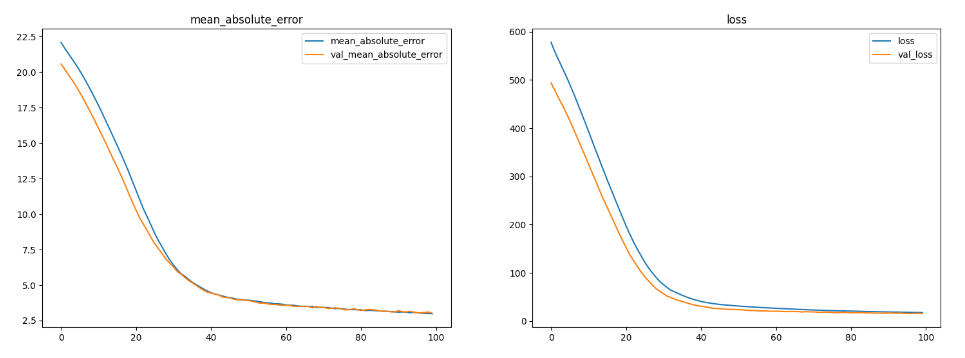

# 스케일링 후
# mean_absolute_error : 3.4994, loss : 23.9675  

model.add(Dense(32, input_shape=(13,), activation='relu'))  
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])  
epochs=100  
batch_size=32    

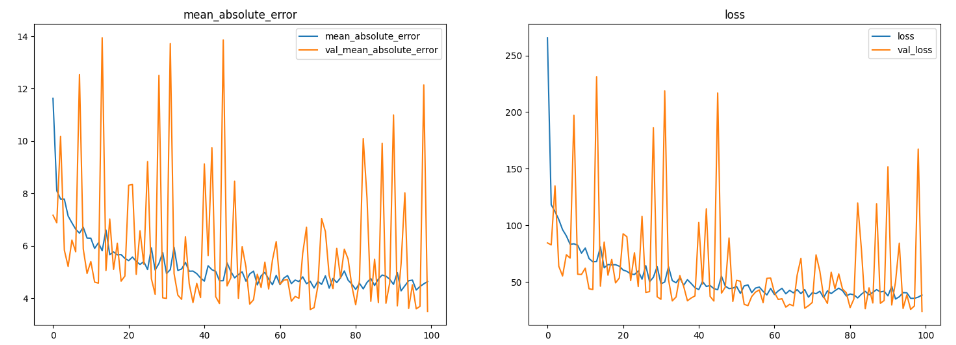

# 스케일링 전
# mean_absolute_error : 3.5452, loss : 25.7399
model.add(Dense(32, input_shape=(13,), activation='relu'))  
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])  
epochs=100  
batch_size=32  

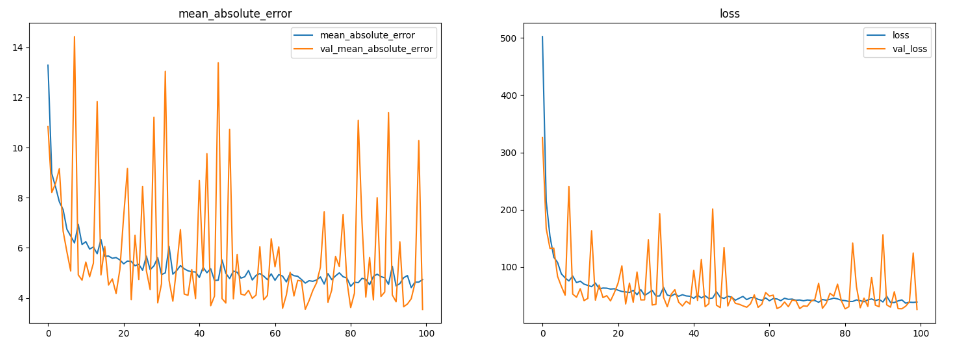

# 스케일링 전
# mean_absolute_error : 4.2095, loss : 32.3990
model.add(Dense(32, input_shape=(13,), activation='relu'))  
model.add(Dense(51))  
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])  
epochs=100
batch_size=32  
  
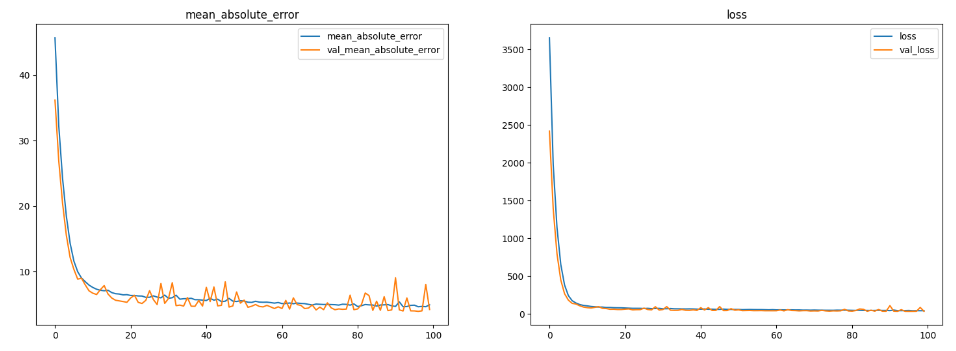

# 그래프 2

## 정확도: 0.1184, 손실: 3.1244  

model.add(Dense(64, input_shape=(13,), activation='tanh'))  
model.add(Dense(51, activation='softmax'))  
  
model.compile(loss='categorical_crossentropy',   
              optimizer='rmsprop', metrics=['accuracy'])  
              
epochs = 100  
batch_size = 16  


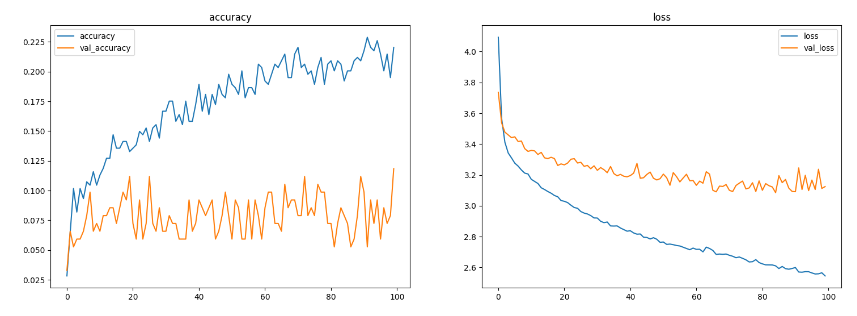


## 정확도: 0.9298, 손실: 0.4765

model.add(Dense(64, input_shape=(13,), activation='relu')) 
model.add(Dense(51))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='rmsprop', metrics=['accuracy'])

epochs = 100
batch_size = 16

history = model.fit(X_train, y_train2, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test2))
                    
                    
## ???? 
                    
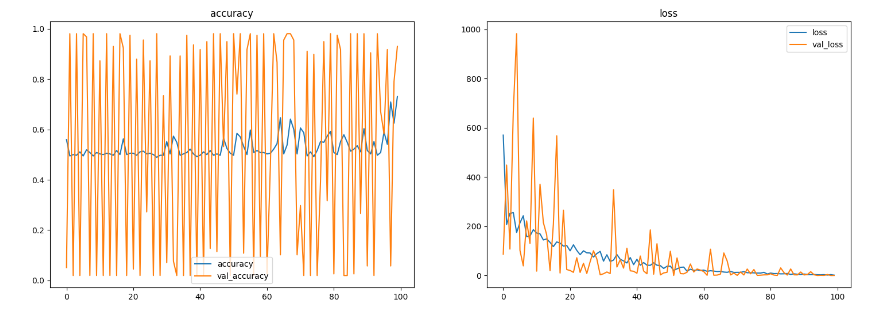

말도 안되는 그래프가?  
어디가 잘못된?

## 정확도: 0.9488, mean_squared_error: 0.1066

model.add(Dense(64, input_shape=(13,), activation='relu')) 
model.add(Dense(51))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 16

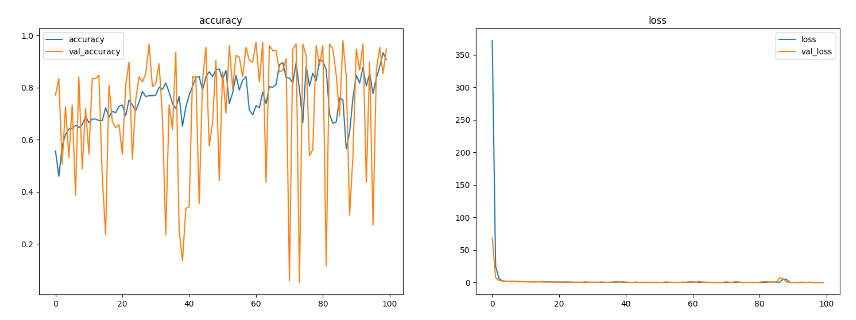

## 정확도: 0.7908, mean_squared_error: 1.5472


model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', 
              optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 16


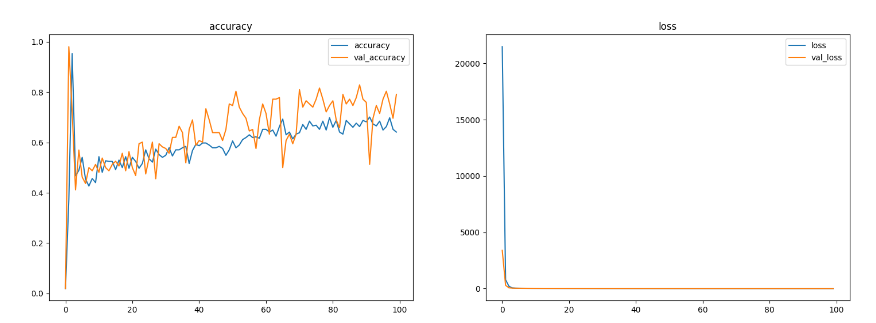

# 회귀 metrics
# 평균 절대 오차(MAE), 평균 제곱 오차(MSE)
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])  
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))  

In [21]:
history.history

{'loss': [607.744384765625,
  587.5870361328125,
  570.8645629882812,
  553.8760375976562,
  538.0283813476562,
  520.8290405273438,
  503.3318786621094,
  485.229736328125,
  466.18475341796875,
  447.5679626464844,
  428.3288879394531,
  408.5644836425781,
  388.8877258300781,
  369.69586181640625,
  350.0838317871094,
  330.59991455078125,
  311.62664794921875,
  292.55059814453125,
  273.2847900390625,
  253.89706420898438,
  234.85780334472656,
  216.93145751953125,
  199.32717895507812,
  183.86944580078125,
  168.6297149658203,
  153.55209350585938,
  139.884765625,
  127.69329071044922,
  115.95221710205078,
  105.00074768066406,
  96.57315063476562,
  87.95892333984375,
  80.35821533203125,
  75.00098419189453,
  69.71269226074219,
  64.1558837890625,
  59.63252639770508,
  55.231422424316406,
  51.420860290527344,
  48.21540832519531,
  44.9215087890625,
  42.33846664428711,
  40.068294525146484,
  37.88986587524414,
  36.339637756347656,
  34.79050064086914,
  33.56683349609

In [22]:
history.history['loss']
history.history['mean_absolute_error']
history.history['val_loss']
history.history['val_mean_absolute_error']

[607.744384765625,
 587.5870361328125,
 570.8645629882812,
 553.8760375976562,
 538.0283813476562,
 520.8290405273438,
 503.3318786621094,
 485.229736328125,
 466.18475341796875,
 447.5679626464844,
 428.3288879394531,
 408.5644836425781,
 388.8877258300781,
 369.69586181640625,
 350.0838317871094,
 330.59991455078125,
 311.62664794921875,
 292.55059814453125,
 273.2847900390625,
 253.89706420898438,
 234.85780334472656,
 216.93145751953125,
 199.32717895507812,
 183.86944580078125,
 168.6297149658203,
 153.55209350585938,
 139.884765625,
 127.69329071044922,
 115.95221710205078,
 105.00074768066406,
 96.57315063476562,
 87.95892333984375,
 80.35821533203125,
 75.00098419189453,
 69.71269226074219,
 64.1558837890625,
 59.63252639770508,
 55.231422424316406,
 51.420860290527344,
 48.21540832519531,
 44.9215087890625,
 42.33846664428711,
 40.068294525146484,
 37.88986587524414,
 36.339637756347656,
 34.79050064086914,
 33.56683349609375,
 32.48871994018555,
 31.58627700805664,
 30.759740

[22.884138107299805,
 22.474376678466797,
 22.115869522094727,
 21.761695861816406,
 21.412565231323242,
 21.04006004333496,
 20.64946746826172,
 20.241025924682617,
 19.804183959960938,
 19.359214782714844,
 18.89603042602539,
 18.410072326660156,
 17.89802360534668,
 17.390634536743164,
 16.870426177978516,
 16.326175689697266,
 15.781457901000977,
 15.197274208068848,
 14.608238220214844,
 13.9660062789917,
 13.334484100341797,
 12.687026977539062,
 12.039658546447754,
 11.444380760192871,
 10.841803550720215,
 10.223779678344727,
 9.657508850097656,
 9.124850273132324,
 8.59212875366211,
 8.097394943237305,
 7.6804094314575195,
 7.213109016418457,
 6.816514492034912,
 6.528654098510742,
 6.228889465332031,
 5.9020094871521,
 5.659539222717285,
 5.435186862945557,
 5.234892845153809,
 5.064449787139893,
 4.8806257247924805,
 4.744449138641357,
 4.601486682891846,
 4.483922004699707,
 4.376029968261719,
 4.278415679931641,
 4.203916549682617,
 4.112367153167725,
 4.058465957641602,
 

[519.5938110351562,
 504.3713073730469,
 487.8997802734375,
 474.2065124511719,
 458.7430114746094,
 442.9271240234375,
 426.462646484375,
 408.453857421875,
 391.7235412597656,
 374.3327941894531,
 356.2342834472656,
 338.1925354003906,
 320.4669494628906,
 302.0613098144531,
 284.0278625488281,
 267.654296875,
 250.0213623046875,
 233.11849975585938,
 215.3831024169922,
 198.41775512695312,
 182.5330810546875,
 165.7230224609375,
 152.7589111328125,
 139.80760192871094,
 126.519287109375,
 114.98088073730469,
 104.6897964477539,
 94.61900329589844,
 84.85821533203125,
 78.07112121582031,
 71.2098159790039,
 64.5374755859375,
 60.382877349853516,
 56.08303451538086,
 51.78839874267578,
 48.387474060058594,
 44.93833541870117,
 41.84505081176758,
 39.1744499206543,
 36.46900939941406,
 34.632347106933594,
 32.77138900756836,
 31.000450134277344,
 28.938405990600586,
 27.952266693115234,
 27.428415298461914,
 25.965612411499023,
 25.372854232788086,
 25.022262573242188,
 24.442674636840

[21.321805953979492,
 20.964258193969727,
 20.597013473510742,
 20.264541625976562,
 19.895896911621094,
 19.513046264648438,
 19.112627029418945,
 18.662792205810547,
 18.230863571166992,
 17.772289276123047,
 17.289775848388672,
 16.782983779907227,
 16.277231216430664,
 15.746960639953613,
 15.205821990966797,
 14.682421684265137,
 14.104334831237793,
 13.534783363342285,
 12.901873588562012,
 12.268954277038574,
 11.639013290405273,
 10.973257064819336,
 10.468775749206543,
 9.955510139465332,
 9.425376892089844,
 8.972330093383789,
 8.550524711608887,
 8.129992485046387,
 7.703525543212891,
 7.4108500480651855,
 7.122440338134766,
 6.810318946838379,
 6.6007609367370605,
 6.351743221282959,
 6.073792934417725,
 5.860250949859619,
 5.646175384521484,
 5.436288356781006,
 5.239048480987549,
 5.010318756103516,
 4.8642354011535645,
 4.708131313323975,
 4.5570387840271,
 4.383240699768066,
 4.288677215576172,
 4.244720458984375,
 4.128735065460205,
 4.0725884437561035,
 4.047519683837

In [23]:
# X_train.shape
# y_train.shape
# X_test.shape
# y_test.shape

# 모델 저장 / 로드

In [24]:
model.save('./data/boston_house_model.keras')

In [25]:
loaded_model = load_model('./data/boston_house_model.keras')
loaded_model

# Summary

In [26]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                588       
                                                                 
 dense_1 (Dense)             (None, 1)                 43        
                                                                 
Total params: 631 (2.46 KB)
Trainable params: 631 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 훈련 모델 예측 값 비교 / 평가

In [27]:
# 훈련 모델 테스트 예측값 y_pred
y_pred = loaded_model.predict(X_test, verbose=0)
y_pred_top20 = y_pred[:20].reshape(1,-1)[0].round(1)
y_pred_top20
# [22.7, 18.2, 36.8, 18.8, 28.4, 17.6, 28. , 18. , 14.6, 14.7]]

# 실제 테스트 타겟 값
y_test.values[:20]
# [21.7, 19.9, 36.5, 12.5, 29. , 18.1, 24.1, 20. ,  9.7, 12.7]

array([21. , 18.4, 35.8, 18.7, 30.1, 17.4, 26.7, 15. , 14.1, 15. , 18.3,
       20.4, 26.3, 41.3, 23.6, 23. ,  2.5, 12.4, 30.7, 23.4],
      dtype=float32)

array([21.7, 19.9, 36.5, 12.5, 29. , 18.1, 24.1, 20. ,  9.7, 12.7, 16.7,
       18.6, 23.3, 48.3, 19.4, 23.1, 10.4, 12.7, 24. , 20.3])

In [28]:
price_pred = pd.DataFrame({'예측가격': y_pred_top20, '실제가격': y_test.values[:20]})
price_pred

,예측가격,실제가격
0,21.000000,21.7
1,18.400000,19.9
2,35.799999,36.5
3,18.700001,12.5
4,30.100000,29.0
5,17.400000,18.1
6,26.700001,24.1
7,15.000000,20.0
8,14.100000,9.7
9,15.000000,12.7


In [29]:
# 훈련 평가

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : {0:.3F}, RMSE : {1:.3f}".format(mse, rmse))
print("R제곱 : {0:.3F}".format(r2))

# MSE : 15.144, RMSE : 3.892
# R제곱 : 0.787

MSE : 13.850, RMSE : 3.722
R제곱 : 0.806


In [30]:
y_test.mean()
y_pred.mean()

21.654605263157894

22.5672

# 가중치(weight), 편향(bias)

In [31]:
loaded_model.layers

In [32]:
# 선형 회귀 계수와 절편 -> 딥러닝 : 가중치(weight), 편향(bias)

for i, layer in enumerate(loaded_model.layers):
    print(f"레이어 {i + 1} : \n")
    
    print(f"가중치 : \n{layer.get_weights()[0]}")  # 가중치
    
    print(f"편향 : \n{layer.get_weights()[1]}")  # 편향    

레이어 1 : 

가중치 : 
[[-1.03442043e-01 -5.80293000e-01 -8.32160532e-01 -8.78163218e-01
  -7.81187594e-01 -2.12439373e-01  3.91756713e-01 -1.15794010e-01
  -5.03454149e-01 -4.84431028e-01 -4.45068665e-02  4.41940337e-01
   3.11294831e-02 -1.61542222e-01 -8.70864213e-01 -4.21980977e-01
  -4.89108488e-02 -1.82323694e-01 -4.25368875e-01 -3.78464490e-01
  -3.04097354e-01 -8.95830393e-01  3.68950367e-01 -3.03512067e-01
  -1.38670504e-01 -2.55777627e-01 -8.35037529e-02 -6.08931243e-01
  -2.51579463e-01 -6.05325222e-01 -6.19653404e-01 -5.68696141e-01
  -1.46404266e-01 -2.49040604e-01 -4.78197068e-01 -4.02804911e-01
  -5.64216793e-01 -1.85064733e-01 -7.72313237e-01 -2.12711245e-01
  -6.27302945e-01 -4.06250864e-01]
 [ 7.67278075e-02  2.55326927e-01 -8.07679892e-01 -4.95975725e-02
  -4.25217420e-01  9.14330110e-02  2.34968394e-01 -5.86086094e-01
   3.95537317e-01  3.92638557e-02 -6.87457323e-01  2.62154490e-01
  -2.65756756e-01 -6.60392284e-01 -1.18137695e-01 -5.53397775e-01
  -8.33861113e-01  2.448

In [33]:
# layer.get_weights()
layer.get_weights()[0].size # 42
layer.get_weights()[1]

42

array([0.63397676], dtype=float32)